<a href="https://colab.research.google.com/github/KLeeDE/Machine-Learning/blob/master/Zip%20Codes%20Business%20Patterns%3A%20economic%20trends%20across%20geographies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLPP // Assignment #3

assigned : **Feb 27, 2020**

DUE : **Mar 4, 2020 11:59pm**

## Zip Codes Business Patterns: economic trends across geographies

<img src="https://larrylittlefield.files.wordpress.com/2017/08/retsmall2015new.png" width=300>

---

*Your goal for this assignment will be to identify spatio-temporal trends in the number of businesses per zip code.*

<b>

Rules for homeworks:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed at the top of this notebook.  Direct copying from someone else's notebook is not permitted.

2. Late homeworks will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

### PART 1 - Background

<b>

  <u>In your own words</u>, provide a brief (no more than 500 words) descriptive overview of [zipcode business patterns (ZBP)](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html) data and outcomes including:

1. how and why the data are collected
  
2. what information the raw data contains

3. how zip codes business patterns (ZBP) data has been used by researchers and practitioners

4. limitations of the data

Please include *references* within the description via weblinks.

</b>

**1. how and why the data are collected**
ZIP Codes Business Patterns (ZBP) provides annual statistics for businesses with paid employees within the U.S. at the ZIP Code level (United States Census Bureau [USCB], 2020). Business Patterns data from the US Census are an essential resource to help understand the characteristics of area businesses (Grodach & Ehrenfeucht, 2015).  

**2. what information the raw data contains**
The raw data contains the number of establishments, employment, first quarter payroll, and annual payroll. According to the ZBP official website, "the data are shown at the 5-digit ZIP Code level only and for NAICS code 00 (Total for all sectors) only. In addition, there are employment size class for 2 - through 6 - digit NAICS code level" (United States Census Bureau [USCB], 2020).

**3. how zip codes business patterns (ZBP) data has been used by researchers and practitioners**
The ZBP database provides data on the number of feature establishments by zipcode. Researchers and practitioners are using this ZBP data to analyze product quality and market size in social science (Berry & Waldfogel, 2010), alcohol outlet density (Matthews et al., 2011), and  so on.  

**4. limitations of the data**
According to Grodach & Ehrenfeucht (2015), there are some limitations and challenges to using the ZBP data. First, business patterns data are organized under the North American Industrial Classification System (NAICS) and it does not capture all economic activity. Second, the data are suppressed or not directly reported because it may compromise confidentiality requirements. Finally, it is very difficult to examine industry change over an extended period of time. 

**References:**

Berry, S., & Waldfogel, J. (2010). Product quality and market size. The Journal of Industrial Economics, 58(1), 1-31. Retreived from: https://onlinelibrary.wiley.com/doi/full/10.1111/j.1467-6451.2010.00404.x

Grodach, C., & Ehrenfeucht, R. (2015). Urban Revitalization: Remaking cities in a changing world. Routledge.

Matthews, S. A., McCarthy, J. D., & Rafail, P. S. (2011). Using ZIP code business patterns data to measure alcohol outlet density. Addictive behaviors, 36(7), 777-780.

United States Census Bureau. Retrieved 2/4/2020 from: https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html

Whitehouse, H. T. (1994). U.S. Patent No. 5,341,505. Washington, DC: U.S. Patent and Trademark Office.


### PART 2 - Loading and visualizing the data

<b> Load the pre-cleaned NYC zipcode business patterns data (in the `mlpp20/data/zbp/` folder) into a pandas DataFrame. </b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

plt.style.use("bmh")

from google.colab import drive
drive.mount('/content/drive')

fname = "/content/drive/My Drive/mlpp20/data/zbp/nyc_zbp_est_total_2000_2012_clean.csv"
nyc = pd.read_csv(fname)
nyc

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235,-73.996930,40.750213
1,10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954,-73.985677,40.716152
2,10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214,-73.988850,40.731947
3,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.012847,40.703472
4,10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442,-74.040777,40.698767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.832606,40.607089
242,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.811580,40.587210
243,11693,79,89,94,98,96,97,104,110,125,131,132,131,129,-73.840021,40.630053
244,11694,288,301,302,302,303,317,315,332,328,317,330,326,326,-73.851767,40.575181


Note that this DataFrame has the zip code, number of establishments in a given year from 2000 to 2012, and the latitude/longitude of the zip codes.


<b>Extract the data for the number of establishments per zipcode per year from the DataFrame using the `.values` attribute so that you have a rectangular 2D numpy array that has Nrows x Ncols where Nrows is the number of zipcodes and Ncols is number of years.</b>

In [2]:
cols = nyc.columns[1:-2]
cols

Index(['N_est_2000', 'N_est_2001', 'N_est_2002', 'N_est_2003', 'N_est_2004',
       'N_est_2005', 'N_est_2006', 'N_est_2007', 'N_est_2008', 'N_est_2009',
       'N_est_2010', 'N_est_2011', 'N_est_2012'],
      dtype='object')

In [3]:
lvals = nyc[cols].values.copy()
lvals

array([[7317, 7188, 7141, ..., 7241, 7227, 7235],
       [2277, 2543, 2269, ..., 2872, 2912, 2954],
       [3683, 3602, 3616, ..., 4113, 4159, 4214],
       ...,
       [  79,   89,   94, ...,  132,  131,  129],
       [ 288,  301,  302, ...,  330,  326,  326],
       [  39,   40,   37, ...,   48,   46,   49]])

<b> Create a numpy array `years` for the values of the years between 2000 and 2012 using the `np.arange` function. </b>

In [0]:
years = np.arange(2000, 2013)

<b>Make a heat map of the raw NYC data using matplotlib's `imshow` function with an `aspect` equal to "auto" and color limits `clim` of 0 to 3000$^{\dagger}$ (make sure to use a colorbar and label your x-axis).</b>

<small>$^{\dagger}$ this means that the values $\leq0$ will have the lowest color value in your heat map and values $\geq3000$ will have the maximum color value in your heat map.

Text(0.875, 0.5, 'number of establishments')

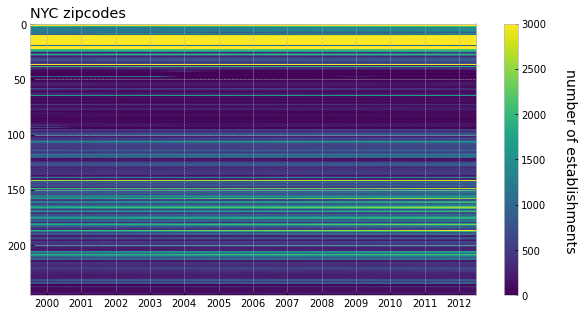

In [5]:
fig, ax = plt.subplots(figsize=[10,5])
im = ax.imshow(lvals, aspect="auto", clim=[0, 3000], cmap="viridis")
xt = np.arange(0,13)
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_title("NYC zipcodes", loc="left")
fig.colorbar(im, ax=ax)
fig.text(0.875, 0.5, "number of establishments", va="center", ha="center", 
         rotation=-90, fontsize=14)

<b> Is this heat map informative?  Why or why not?  What information can you glean from it? </b>

A heatmap is a graphical representation of data where values are depicted by color. Therefore, it is a data visualiztion tool that uses color the way a bar graph uses height and width. In this heatmap, it is somewhat informative in that it gives an information about values where the data is collectively located, however, it is hard to get information that where the data is located in detail. Therefore, it is important to standardize the data and then make a heatmap to glean from it.  










<b> Standardize the NYC values across features (time steps).  Generate a new heatmap with color limits -2 to 2. </b>

In [6]:
lvals_st = (lvals - lvals.mean(axis=1, keepdims=True)) / lvals.std(axis=1, keepdims=True)
lvals_st

array([[ 0.16133494, -0.85964129, -1.23162487, ..., -0.44017043,
        -0.55097405, -0.4876577 ],
       [-1.68710279, -0.44529746, -1.72445032, ...,  1.09061967,
         1.27735731,  1.47343184],
       [-1.09431562, -1.4806094 , -1.41384257, ...,  0.95637976,
         1.17575647,  1.43805472],
       ...,
       [-1.67294227, -1.11242037, -0.83215943, ...,  1.29782377,
         1.24177158,  1.1296672 ],
       [-1.96866513, -0.99868143, -0.9240673 , ...,  1.16512834,
         0.86667182,  0.86667182],
       [-1.36459632, -1.13420993, -1.8253691 , ...,  0.70888121,
         0.24810842,  0.9392676 ]])

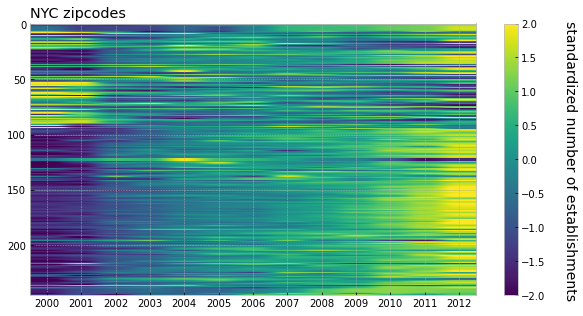

In [7]:
fig, ax = plt.subplots(figsize=[10,5])
im = ax.imshow(lvals_st, aspect="auto", cmap = "viridis", clim=[-2, 2])
xt = np.arange(0, 13)
ax.set_xticks(xt)
ax.set_xticklabels(years[xt])
ax.set_title("NYC zipcodes", loc="left")
fig.colorbar(im, ax=ax)
fig.text(0.875, 0.5, "standardized number of establishments", va="center", 
         ha="center", rotation=-90, fontsize=14)
fig.show()

<b> Is this NEW heat map informative?  Why or why not?  What information can you glean from it?  Is there a trend across zip codes that can be discerned here?  Are there multiple trends? </b>

The new heatmap is informative. It is because it shows height/weight of the data better than the heatmap above. The information I can glean from this heatmap is that the data was shown as dark blue (-2.0) in 2000 and then it is slowly turned to yellow (2.0) in 2012. It means there is a trend across zip codes that can be discerned here. Based on multiple colors in the heatmap, we can conclude that there are multiple trends between 2000 and 2012 that is showing in the heatmap above. 










### PART 3 - Clustering NYC data

<b> Using scikit-learn's `KMeans` model, cluster the standardized NYC data into 2 clusters setting `random_state` equal to 2. </b>

In [8]:
km = KMeans(n_clusters=2, random_state=2)
km.fit(lvals_st)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

<b> Plot the two clusters on the same line plot in dodgerblue (cluster 0) and crimson (cluster 1).  Make sure to use proper values for the x-axis, axis labels for the axes, and include a legend. </b>

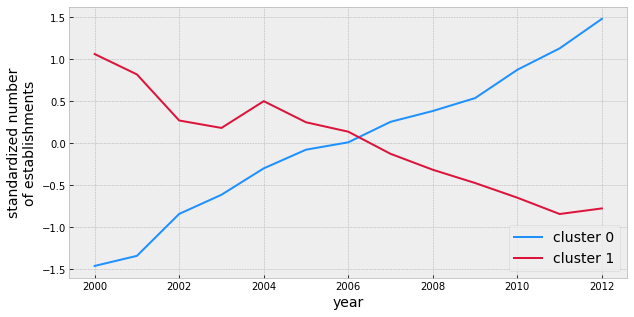

In [9]:
# -- plot the cluster centers
fig, ax = plt.subplots(figsize=[10, 5])
ax.plot(years, km.cluster_centers_[0], color="dodgerblue", label="cluster 0")
ax.plot(years, km.cluster_centers_[1], color="crimson", label="cluster 1")
ax.set_xlabel("year", fontsize=14)
ax.set_ylabel("standardized number\nof establishments", fontsize=14)
ax.legend(fontsize=14)
fig.show()

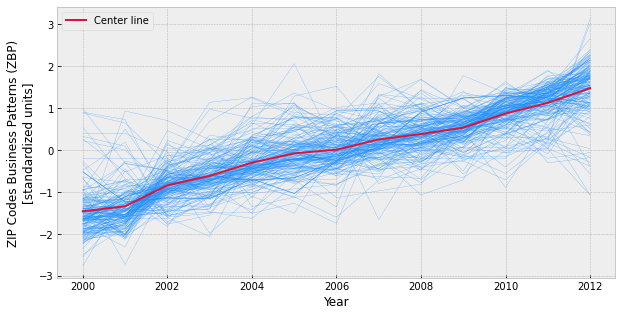

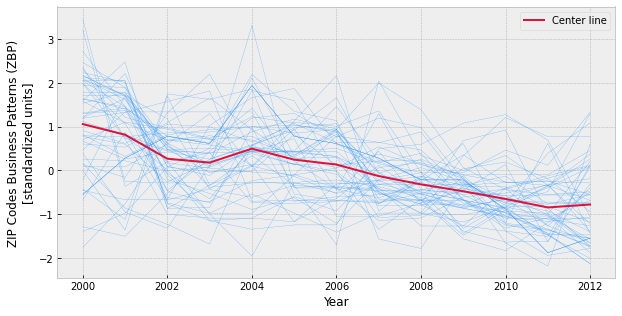

zipcode [10001 10006 10007 10010 10013 10016 10017 10019 10020 10021 10022 10023
 10036 10038 10043 10055 10080 10081 10103 10105 10106 10107 10110 10111
 10118 10121 10122 10123 10151 10152 10158 10162 10165 10166 10169 10170
 10172 10173 10175 10176 10178 10270 10271 10278 10279 10281 10285 10464
 10464 10464 11005 11363 11414 11430 11451]





In [10]:
# Cf: plot each cluster individually and its members
for cnum in range(km.n_clusters):
  # True/False index of where label_ is cnum
  ind = km.labels_ == cnum
  # get the members of that cluster number
  mems = lvals_st[ind]
  # make a plot
  fig, ax = plt.subplots(figsize=[10,5])
  ax.plot(years, mems.T, lw=0.2, color="dodgerblue")
  ax.plot(years, km.cluster_centers_[cnum], color="crimson", label = "Center line")
  ax.set_xlabel("Year")
  ax.set_ylabel("ZIP Codes Business Patterns (ZBP)\n[standardized units]")
  ax.legend()
  fig.show()

# "referesh" the screen
plt.pause(0.01)

# add some space after the graph
zipcode = nyc["zip"].values
print ("zipcode", zipcode[ind])
print("\n\n")

<b> Extract the latitude and longitude of the NYC zipcodes from the original dataframe and make a scatter plot of the longitude (x) and latitude (y) values with the following characteristics:
 
  1. set the figsize to be square
  2. set the facecolor of the axis to be lightgray
  3. set the zipcodes that are labeled as being in cluster 0 to be dodgerblue in color
  4. set the zipcodes that are labeled as being in cluster 1 to be crimson in color
  5. set the alpha values of the points to be 0.5

  
 </b>

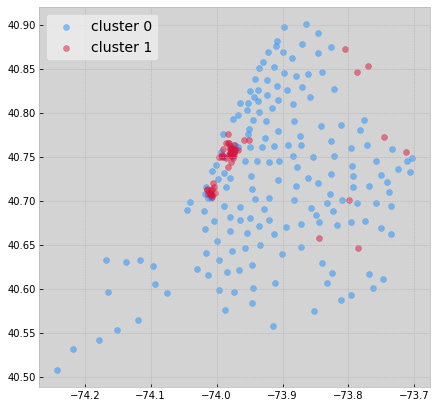

In [11]:
# extract latitude and longitude
long = nyc["longitude"].values
lat = nyc["latitude"].values

# make T/F array for cluster labels
ind0 = km.labels_ == 0
ind1 = km.labels_ == 1

# set the figsize to be square
fig, ax = plt.subplots(figsize=[7,7])
# set the facecolor of the axis to be lightgray
ax.set_facecolor("lightgray")
# set the zipcodes that are labeled as being in cluster 0 to be dodgerblue in color
plt.scatter(long[ind0], lat[ind0], c = "dodgerblue", alpha=0.5, label="cluster 0" )
# set the zipcodes that are labeled as being in cluster 1 to be crimson in color
plt.scatter(long[ind1], lat[ind1], c = "crimson", alpha=0.5, label="cluster 1")
ax.legend(fontsize=14)
fig.show()

<b> Comparing this with a map of NYC zip codes to orient yourself spatially, what does this plot tell you about spatio-temporal trends in the number of businesses in NYC? </b>

Comparing this with a map of NYC zip codes spatially, this plot tells about spatio-temparal trends in the number of businesses in NYC. Specifically, KM algorithms seek to cluster data observations around "Centroid" points. K-Means clustering is all about minimizing the mean-squared distance (MSD) between data observations and their Centroids. Therefore, the dodgerblue dots show the result of the data when KM is 0 based on longitude and latitude. The crimson dot shows the "Centroid" point based on KM algorithm. 






<b> Cluster the standardized NYC data with 4 clusters and setting  `random_state` equal to 2. </b>

In [12]:
km4 = KMeans(4, random_state=2)
km4.fit(lvals_st)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

<b> Make a four panel plot <small>(see [this stackoverflow question](https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib) for guidance)</small>, one for each cluster center, showing the cluster center and its members.   Put the number of zip codes belonging to that cluster as the title of each axis. </b>

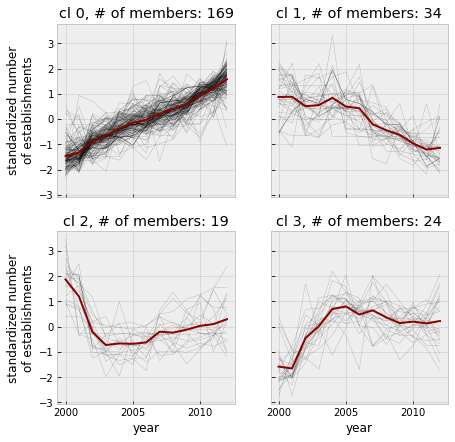

In [13]:
# For my reference: Answer

# -- initialize plot
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[7, 7])

# -- loop through clusters
for ii in range(km4.n_clusters):

  # -- set ax row and col index
  irow = ii // 2
  icol = ii % 2

  # -- define index for this color
  ind = km4.labels_ == ii

  # -- get the member time series
  mems = lvals_st[ind]

  # -- plot members
  ax[irow, icol].plot(years, mems.T, color="k", lw=0.1)

  # -- plot cluster center
  ax[irow, icol].plot(years, km4.cluster_centers_[ii], c="darkred")

  # -- set title to be number of members
  ax[irow, icol].set_title("cl {0}, # of members: {1}".format(ii, ind.sum()))

# -- set the axis labels
ax[1, 0].set_xlabel("year")
ax[1, 1].set_xlabel("year")
ax[0, 0].set_ylabel("standardized number\nof establishments")
ax[1, 0].set_ylabel("standardized number\nof establishments")

# -- show the figure
fig.show()

<b> Make a scatter plot of the longitude (x) and latitude (y) values with the following characteristics:
 
  1. set the figsize to be square
  2. set the facecolor of the axis to be lightgray
  3. set the zipcodes that are labeled as being in cluster 0 to be dodgerblue in color
  4. set the zipcodes that are labeled as being in cluster 1 to be crimson in color
  5. set the zipcodes that are labeled as being in cluster 2 to be darkorange in color
  6. set the zipcodes that are labeled as being in cluster 3 to be indigo in color
  7. set the alpha value of the points to be 0.5


 </b>

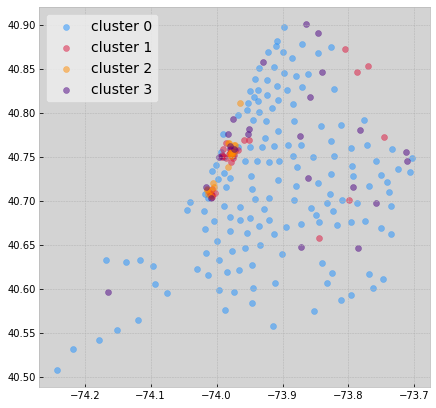

In [14]:
# For my reference: Answer

# -- create a colors list
clrs = ["dodgerblue", "crimson", "darkorange", "indigo"]

# -- initialize the plot
fig, ax = plt.subplots(figsize=[7, 7])
ax.set_facecolor("lightgray")

# -- loop through cluster centers
for ii in range(km4.n_clusters):

  # -- set T/F array for cluster label
  ind = km4.labels_ == ii

  # -- add scatter plot
  ax.scatter(long[ind], lat[ind], c=clrs[ii], alpha=0.5, label="cluster {0}".format(ii))

# -- add legend
ax.legend(fontsize=14)
fig.show()

<b> Given the shape of the cluster centers, how do you interpret this scatter plot?  What are two possible reasons for the patterns visible in this (and the previous) scatter plot? </b>

K-means clustering is a tool for data cluster analysis. It can identify subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very differnt (Dabbura, 2020). Threfore, the scatter plot above gives the information of the cluster centers which include information about homogeneous subgroups within the data.

Two possible reasons for the patterns visible in this and the previous scatter plot can be estimated as followings. First, the cluster center is changing following as K-means. Second, subgroups can be classified to four different groups based on cluster centers.  

Reference:

Imad Dabbura (Sep 17, 2018). K-Means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks. Towrads Data Science. Retrieved from: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a


### PART 4 - Clustering the full US sample

<b> Load the pre-cleaned full US zipcode business patterns data (also in the `mlpp20/data/zbp/` folder) into a pandas DataFrame. </b>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

fname2 = "/content/drive/My Drive/mlpp20/data/zbp/all_zbp_est_total_2000_2012_clean.csv"
allzbp = pd.read_csv(fname2)
allzbp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31599,99923,7,7,8,8,7,8,7,5,5,6,6,6,5,-130.040519,55.981117
31600,99925,26,24,21,22,20,19,23,23,22,25,19,20,24,-132.976265,55.557671
31601,99926,15,15,14,15,15,14,15,13,13,12,14,13,13,-131.490108,55.127000
31602,99927,2,3,3,2,2,3,1,3,2,2,2,3,3,-133.378427,56.250473


<b> Remove all zipcodes (rows) that have standard deviation equal to 0 across the number of establishments columns. </b>


In [0]:
# For my reference: Answer
# -- generate a T/F array (standard deviation across N_est columns ≠ 0)
cols = allzbp.columns[1:-2]
good = allzbp[cols].std(axis=1) > 0
allzbp = allzbp[good]

<b>Again, extract the data for the number of establishments per zipcode per year from the US DataFrame using the `.values` attribute so that you have a rectangular 2D numpy array that has Nrows x Ncols where Nrows is the number of zipcodes and Ncols is number of years.</b>

In [0]:
# For my reference: Answer
# -- extract time series data
Lvals = allzbp[cols].values.copy()

<b> Now standardize across features. </b>

In [0]:
Lvals_st = (Lvals - Lvals.mean(axis=1, keepdims=True)) / Lvals.std(axis=1, keepdims=True)

<b> Cluster the standardized US data into 2 clusters with `random_state` equal to 2. </b>

In [19]:
Km = KMeans(n_clusters=2, random_state=2)
Km.fit(Lvals_st)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

<b> Plot the two clusters on the same line plot in dodgerblue (cluster 0) and crimson (cluster 1).  Make sure to use proper values for the x-axis, axis labels for the axes, and include a legend. </b>


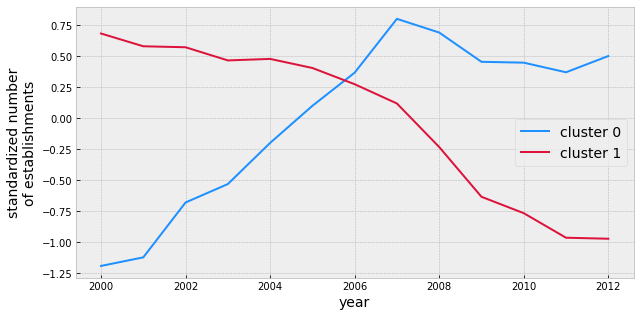

In [20]:
# For my reference: Answer
# -- plot the cluster centers
fig, ax = plt.subplots(figsize=[10, 5])
ax.plot(years, Km.cluster_centers_[0], color="dodgerblue", label="cluster 0")
ax.plot(years, Km.cluster_centers_[1], color="crimson", label="cluster 1")
ax.set_xlabel("year", fontsize=14)
ax.set_ylabel("standardized number\nof establishments", fontsize=14)
ax.legend(fontsize=14)
fig.show()

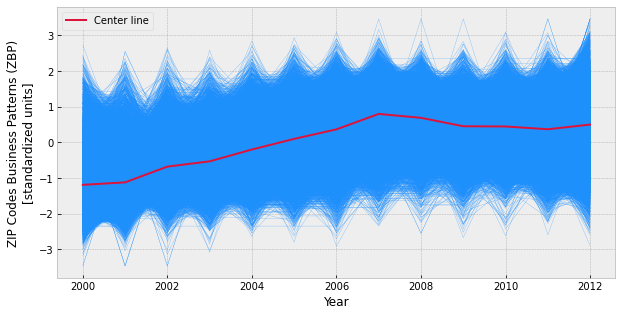

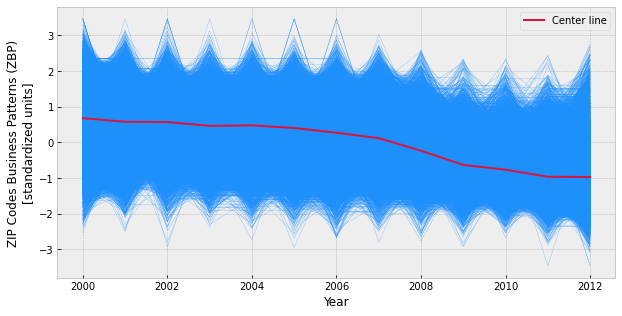

In [21]:
# Cf: plot each cluster individually and its members
for cnum in range(Km.n_clusters):
  # True/False index of where label_ is cnum
  ind = Km.labels_ == cnum
  # get the members of that cluster number
  mems2 = Lvals_st[ind]
  # make a plot
  fig, ax = plt.subplots(figsize=[10,5])
  ax.plot(years, mems2.T, lw=0.2, color="dodgerblue")
  ax.plot(years, Km.cluster_centers_[cnum], color="crimson", label = "Center line")
  ax.set_xlabel("Year")
  ax.set_ylabel("ZIP Codes Business Patterns (ZBP)\n[standardized units]")
  ax.legend()
  fig.show()

<b> Extract the latitude and longitude of the US zipcodes from the original dataframe and make a scatter plot of the longitude (x) and latitude (y) values with the following characteristics:
 
  1. set the figsize to be square (15x15)
  2. set the facecolor of the axis to be lightgray
  3. set the markersize to be 2
  4. set the zipcodes that are labeled as being in cluster 0 to be dodgerblue in color
  5. set the zipcodes that are labeled as being in cluster 1 to be crimson in color
  6. set the alpha values of the points to be 0.5
  7. set the axis xlims to be -130 to -65
  8. set the axis ylims to be 20 to 60

  
 </b>

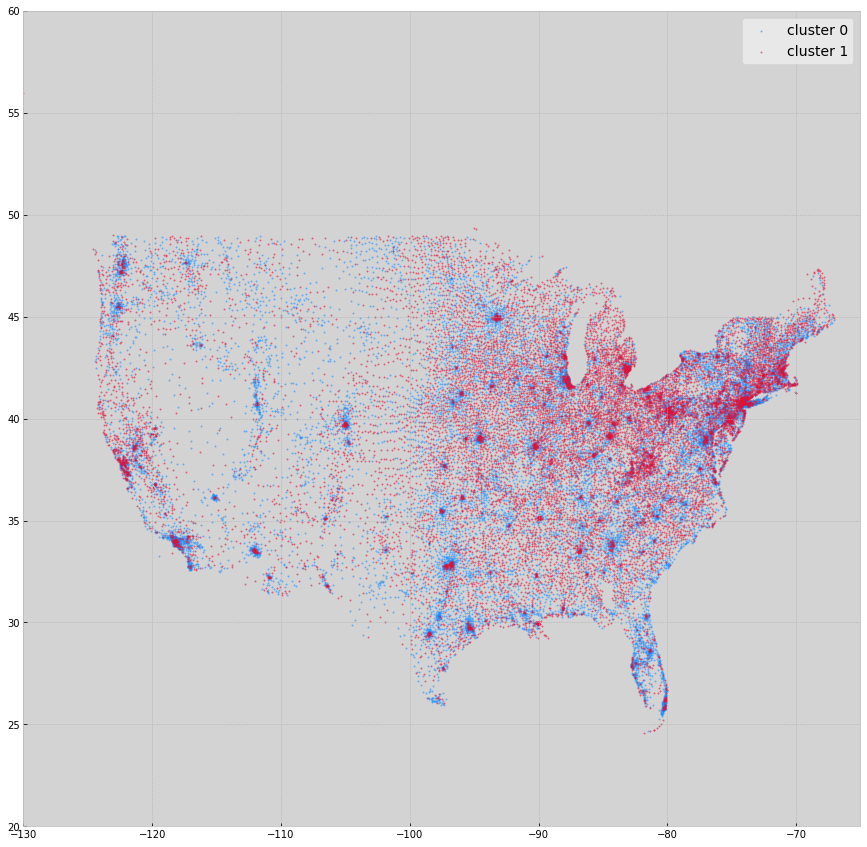

In [22]:
# For my reference: Answer
# -- extract latitude and longitude
long2 = allzbp["longitude"].values
lat2 = allzbp["latitude"].values

# -- make T/F array for cluster labels
ind0 = Km.labels_ == 0
ind1 = Km.labels_ == 1

# -- scatter plot
fig, ax = plt.subplots(figsize=[15, 15])
ax.set_facecolor("lightgray")
ax.scatter(long2[ind0], lat2[ind0], c="dodgerblue", s=2, alpha=0.5, label="cluster 0")
ax.scatter(long2[ind1], lat2[ind1], c="crimson", s=2, alpha=0.5, label="cluster 1")
ax.set_xlim(-130, -65)
ax.set_ylim(20, 60)
ax.legend(fontsize=14)
fig.show()

<b> What can you say about where the number of business saw a period of increase prior to 2008 vs where the number of businesses have been steadily declining since 2000? </b>

As the graph shown above, there are two main findings. First, where the number of business saw a period of increase prior to 2008 is when kmean cluster center is 0 and a period in 2007. Second, where the number of businesses have been steadily declining since 2000 is when kmean cluster center is 1 and a period in 2011 




### EXTRA CREDIT: choosing k for NYC

<b> Use the "elbow method" to determine an appropriate value for k for NYC.

In [0]:
from sklearn.cluster import KMeans
from sklearn import datasets

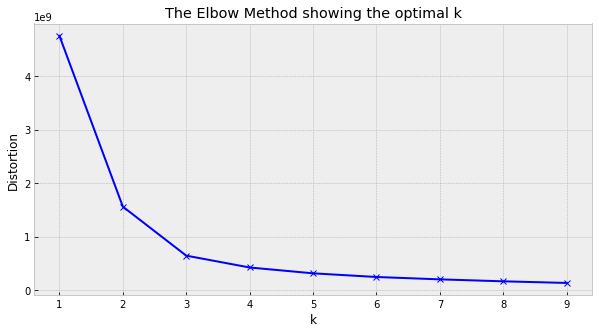

In [24]:
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(nyc)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=[10,5])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
  kmeanModel = KMeans(n_clusters=2)
  kmeanModel.fit(nyc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3038c72e80>,
                 k=None, metric=None, model=None, timings=True)

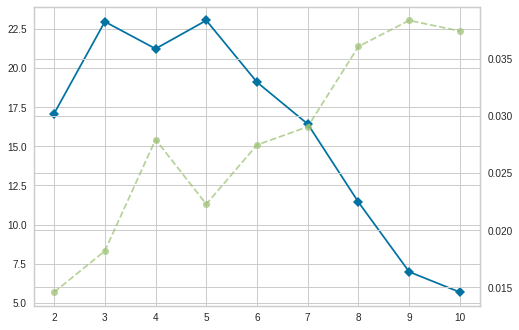

In [26]:
# Additional For fun (1)

# ZBP(std) and years of the NYC zipcodes
# Distortion Score Elbow for KMeans Clustering

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(KMeans(), k=10)
model.fit(mems.T)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3038bcd8d0>,
                 k=None, metric=None, model=None, timings=True)

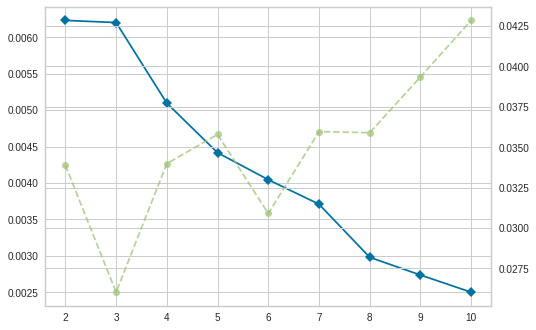

In [27]:
# Additional For fun (2)

# The Latitude and Longitude of the NYC zipcodes
# Distortion Score Elbow for KMeans Clustering

long = nyc["longitude"].values.reshape(-1,1)
lat = nyc["latitude"].values

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(KMeans(), k=10)
model.fit(long)

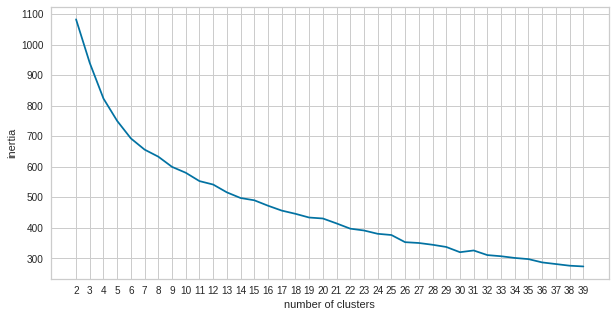

In [28]:
# For my reference: Answer
# -- loop through values of k and calculate the inertia
maxcl = 40
ncls = np.arange(2, maxcl)
inertia = []

for ncl in ncls:
  km = KMeans(n_clusters=ncl)
  km.fit(lvals_st)

  inertia.append(km.inertia_)

# -- make a plot
fig, ax = plt.subplots(figsize=[10, 5])
ax.plot(ncls, inertia)
ax.set_xticks(ncls)
ax.set_xlabel("number of clusters")
ax.set_ylabel("inertia")
fig.show()

Based on the above plot the "elbow" is roughly k = 4 or 5.